In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
class BSpline:
    """
    A class to represent a B-spline curve.

    Attributes
    ----------
    control_points : np.array
        Array of control points for the B-spline curve.
    degree : int
        Degree of the B-spline curve.
    num_control_points : int
        Number of control points.
    knot_vector : np.array
        Knot vector for the B-spline curve.

    Methods
    -------
    _generate_knot_vector():
        Generates a uniform knot vector.
    
    bspline_basis(i, k, t):
        Recursively calculates the B-spline basis function.

    bspline_curve(num_points=100):
        Computes the B-spline curve.

    plot_curve():
        Plots the B-spline curve along with control points.
    """
    
    def __init__(self, control_points, degree):
        """
        Constructs all the necessary attributes for the BSpline object.

        Parameters
        ----------
        control_points : list of lists or np.array
            The control points for the B-spline curve.
        degree : int
            The degree of the B-spline curve.
        """
        self.control_points = np.array(control_points)
        self.degree = degree
        self.num_control_points = len(self.control_points)
        self.knot_vector = self._generate_knot_vector()
    
    def _generate_knot_vector(self):
        """
        Generates a uniform knot vector based on the degree and control points.

        Returns
        -------
        np.array
            A uniform knot vector for the B-spline.
        """
        return np.concatenate((
            np.zeros(self.degree),
            np.linspace(0, 1, self.num_control_points - self.degree + 1),
            np.ones(self.degree)
        ))

    def bspline_basis(self, i, k, t):
        """
        Recursively calculates the B-spline basis function.

        Parameters
        ----------
        i : int
            The index of the basis function.
        k : int
            The degree of the B-spline.
        t : float
            The parameter at which to evaluate the basis function.

        Returns
        -------
        float
            The value of the B-spline basis function at t.
        """
        if k == 0:
            return 1.0 if self.knot_vector[i] <= t < self.knot_vector[i+1] else 0.0
        
        denom1 = self.knot_vector[i+k] - self.knot_vector[i]
        denom2 = self.knot_vector[i+k+1] - self.knot_vector[i+1]
        
        term1 = ((t - self.knot_vector[i]) / denom1 * self.bspline_basis(i, k-1, t)) if denom1 != 0 else 0
        term2 = ((self.knot_vector[i+k+1] - t) / denom2 * self.bspline_basis(i+1, k-1, t)) if denom2 != 0 else 0
        
        return term1 + term2

    def bspline_curve(self, num_points=100):
        """
        Computes the B-spline curve using the control points and the basis functions.

        Parameters
        ----------
        num_points : int, optional
            The number of points to generate for the B-spline curve (default is 100).

        Returns
        -------
        np.array
            An array of points representing the B-spline curve.
        """
        n = self.num_control_points - 1  # Number of control points - 1
        curve_points = []

        # Evaluate the curve at each point in the parameter space
        for t in np.linspace(self.knot_vector[self.degree], self.knot_vector[-self.degree-1], num_points):
            point = np.zeros(2)
            for i in range(n + 1):
                b = self.bspline_basis(i, self.degree, t)
                point += b * self.control_points[i]
            curve_points.append(point)
        
        return np.array(curve_points)

    def plot_curve(self):
        """
        Plots the B-spline curve and control points.

        Displays a plot of the B-spline curve with the control points marked.
        """
        curve = self.bspline_curve()
        plt.plot(curve[:, 0], curve[:, 1], label="B-Spline Curve", color="blue")
        plt.plot(self.control_points[:, 0], self.control_points[:, 1], 'o--', label="Control Points", color="red")
        plt.title("B-spline Curve")
        plt.legend()
        plt.grid(True)
        plt.show()




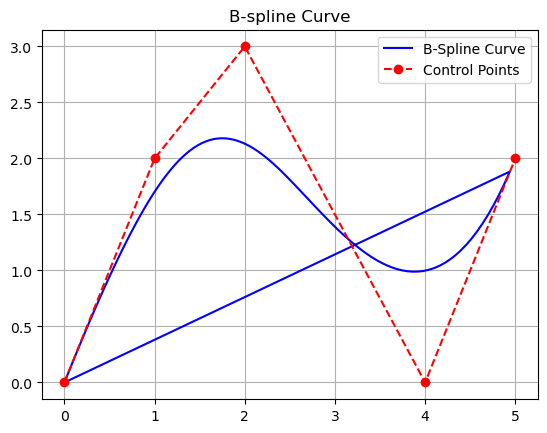

In [8]:
control_points = [
    [0, 0],
    [1, 2],
    [2, 3],
    [4, 0],
    [5, 2]
]

degree = 3


bspline = BSpline(control_points, degree)


bspline.plot_curve()